In [1]:
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

now = datetime.now()

In [3]:
url_page = 'https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000'

page = requests.get(url_page).text 
soup = BeautifulSoup(page, "lxml")

tabla = soup.find('table', attrs={'id': 'ctl00_Contenido_tblAcciones'})
tabla
name=""
price=""
var = ""
maxima = ""
minima = ""
nroFila=0
for fila in tabla.find_all("tr"):
    #for row in  tabla.find_all("td")::
    nroCelda=0
    for celda in fila.find_all('td'):
        if nroCelda==0:
            name=celda.text
            print("Accion:", name)
        if nroCelda==1:
            price=celda.text
            print("Valor:", price)
        if nroCelda==2:
            var=celda.text
            print("Variacion:", var)
        if nroCelda==3:
            maxima=celda.text
            print("Maxima:", maxima)
        if nroCelda==4:
            minima=celda.text
            print("Minima:", minima)
        nroCelda=nroCelda+1
    nroFila=nroFila+1

    with open('bolsa_acciones.csv', 'a') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow([name, price , var , maxima , minima ,now.date()])
        

Accion: ACCIONA
Valor: 157,0000
Variacion: -1,32
Maxima: 160,0000
Minima: 155,5000
Accion: ACERINOX
Valor: 11,2200
Variacion: -1,41
Maxima: 11,4800
Minima: 11,2150
Accion: ACS
Valor: 23,3100
Variacion: 4,72
Maxima: 23,3500
Minima: 22,1500
Accion: AENA
Valor: 151,2500
Variacion: 3,60
Maxima: 151,2500
Minima: 145,2000
Accion: ALMIRALL
Valor: 12,3900
Variacion: -2,21
Maxima: 12,9200
Minima: 12,3700
Accion: AMADEUS
Valor: 61,9400
Variacion: 4,70
Maxima: 62,3800
Minima: 57,2600
Accion: ARCELORMIT.
Valor: 27,9500
Variacion: -1,64
Maxima: 28,4200
Minima: 27,5950
Accion: B.SANTANDER
Valor: 3,2840
Variacion: 1,44
Maxima: 3,3190
Minima: 3,2150
Accion: BA.SABADELL
Valor: 0,6734
Variacion: 0,57
Maxima: 0,6800
Minima: 0,6658
Accion: BANKINTER
Valor: 4,9670
Variacion: 1,82
Maxima: 5,0040
Minima: 4,8760
Accion: BBVA
Valor: 6,0260
Variacion: -0,23
Maxima: 6,1070
Minima: 5,9970
Accion: CAIXABANK
Valor: 2,5060
Variacion: 1,58
Maxima: 2,5270
Minima: 2,4600
Accion: CELLNEX
Valor: 52,7200
Variacion: -1,13


In [4]:
df = pd.read_csv('bolsa_acciones.csv')
df.columns = ["Nombre", "Precio", "Variacion", "Maxima", "Minima", "Fecha"]
df.to_csv('bolsa_acciones.csv')

print(df)

          Nombre    Precio Variacion    Maxima    Minima       Fecha
0        ACCIONA  157,0000     -1,32  160,0000  155,5000  2021-11-06
1       ACERINOX   11,2200     -1,41   11,4800   11,2150  2021-11-06
2            ACS   23,3100      4,72   23,3500   22,1500  2021-11-06
3           AENA  151,2500      3,60  151,2500  145,2000  2021-11-06
4       ALMIRALL   12,3900     -2,21   12,9200   12,3700  2021-11-06
5        AMADEUS   61,9400      4,70   62,3800   57,2600  2021-11-06
6    ARCELORMIT.   27,9500     -1,64   28,4200   27,5950  2021-11-06
7    B.SANTANDER    3,2840      1,44    3,3190    3,2150  2021-11-06
8    BA.SABADELL    0,6734      0,57    0,6800    0,6658  2021-11-06
9      BANKINTER    4,9670      1,82    5,0040    4,8760  2021-11-06
10          BBVA    6,0260     -0,23    6,1070    5,9970  2021-11-06
11     CAIXABANK    2,5060      1,58    2,5270    2,4600  2021-11-06
12       CELLNEX   52,7200     -1,13   53,6400   52,7200  2021-11-06
13  CIE AUTOMOT.   24,6200      0,

In [5]:
df['Variacion'] = df['Variacion'].apply(lambda x: x.replace(',','.'))

df['Variacion'] = df['Variacion'].astype(float)

print(df.sort_values(by=['Variacion']))

maxs = df['Variacion'].max()
minimo= df['Variacion'].min()

print("Maximo de Variación:")
print(maxs)
print("Mínimo de Variación:")
print(minimo)


          Nombre    Precio  Variacion    Maxima    Minima       Fecha
31  SIEMENS GAME   18,7850      -3.07   19,3950   18,3400  2021-11-06
4       ALMIRALL   12,3900      -2.21   12,9200   12,3700  2021-11-06
32       SOLARIA   15,6900      -2.09   16,1750   15,6700  2021-11-06
18  GRIFOLS CL.A   18,5000      -1.86   18,8500   18,1600  2021-11-06
6    ARCELORMIT.   27,9500      -1.64   28,4200   27,5950  2021-11-06
1       ACERINOX   11,2200      -1.41   11,4800   11,2150  2021-11-06
28    PHARMA MAR   60,7000      -1.36   62,7400   60,5000  2021-11-06
0        ACCIONA  157,0000      -1.32  160,0000  155,5000  2021-11-06
12       CELLNEX   52,7200      -1.13   53,6400   52,7200  2021-11-06
17       FLUIDRA   33,1000      -0.60   33,5500   32,9000  2021-11-06
29        R.E.C.   18,1750      -0.30   18,2650   18,1000  2021-11-06
10          BBVA    6,0260      -0.23    6,1070    5,9970  2021-11-06
34      VISCOFAN   59,6000      -0.17   59,9500   59,1500  2021-11-06
27       NATURGY   2

In [6]:
df

,Nombre,Precio,Variacion,Maxima,Minima,Fecha
0,ACCIONA,"157,0000",-1.32,"160,0000","155,5000",2021-11-06
1,ACERINOX,"11,2200",-1.41,"11,4800","11,2150",2021-11-06
2,ACS,"23,3100",4.72,"23,3500","22,1500",2021-11-06
3,AENA,"151,2500",3.60,"151,2500","145,2000",2021-11-06
4,ALMIRALL,"12,3900",-2.21,"12,9200","12,3700",2021-11-06
5,AMADEUS,"61,9400",4.70,"62,3800","57,2600",2021-11-06
6,ARCELORMIT.,"27,9500",-1.64,"28,4200","27,5950",2021-11-06
7,B.SANTANDER,"3,2840",1.44,"3,3190","3,2150",2021-11-06
8,BA.SABADELL,"0,6734",0.57,"0,6800","0,6658",2021-11-06
9,BANKINTER,"4,9670",1.82,"5,0040","4,8760",2021-11-06


In [7]:

def graficar(df, columnaVariacion, columnaNombre, ancho, alto): #(dataframe,ColumnaejeY,ColumnaejeX,Anchodegrafico,Altodegrafico)
    
    y = df[columnaVariacion]
    x = df[columnaNombre]

    plt.figure(figsize=(ancho,alto))
    

    valp = df[columnaVariacion] < 0
    valg = df[columnaVariacion] >= 0


    ma=plt.barh(x, y, valg, color='#0000ff', label='Ganancia')
    mb=plt.barh(x, y, valp, color='#ff0000', label='Pérdida')

    plt.ylabel('ACCIONES')
    plt.xlabel('VARIACIÓN')
    plt.title('VARIACIÓN DE LAS ACCIONES')
    plt.legend()

    return plt.show()

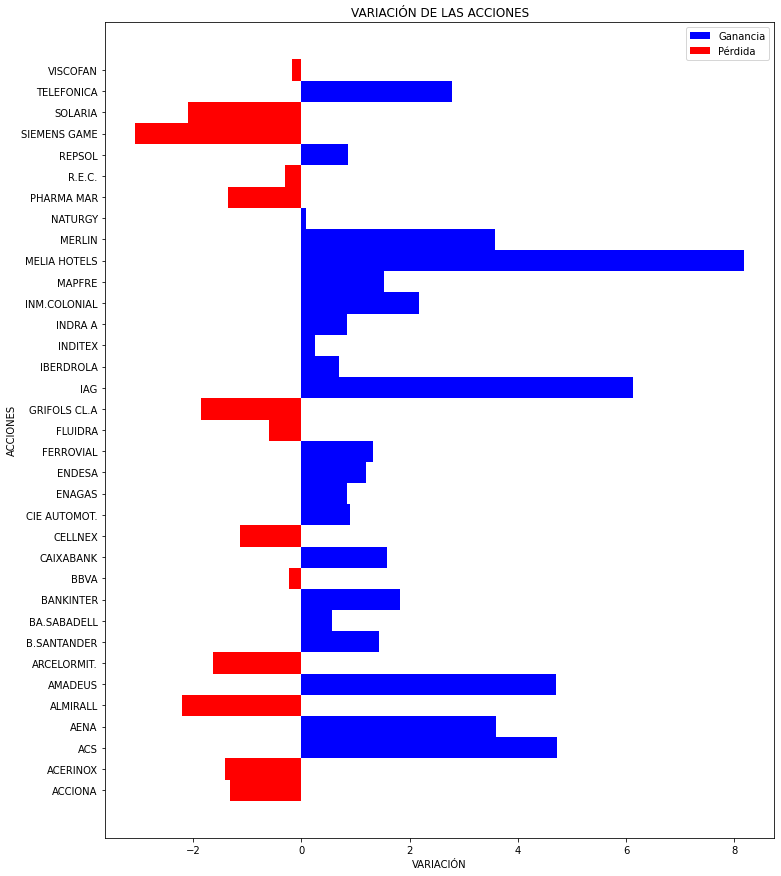

In [10]:
graficar(df,'Variacion','Nombre', 12, 15) #Grafico de la variacion de todas las acciones bolsa de madrid.

In [8]:

maxs = df['Variacion'].max()

minimo= df['Variacion'].min()


print("Maximo de Variación:")
print(maxs)

print("Mínimo de Variación:")
print(minimo)

Maximo de Variación:
8.18
Mínimo de Variación:
-3.07


In [11]:
#muestra las filas que quiero del archivo bolsa madrid este es por indice
df4= df.iloc [[7,10,30,33]]
df4

,Nombre,Precio,Variacion,Maxima,Minima,Fecha
7,B.SANTANDER,"3,2840",1.44,"3,3190","3,2150",2021-11-06
10,BBVA,"6,0260",-0.23,"6,1070","5,9970",2021-11-06
30,REPSOL,"10,8120",0.86,"10,8780","10,5840",2021-11-06
33,TELEFONICA,"3,7660",2.78,"3,8030","3,6480",2021-11-06


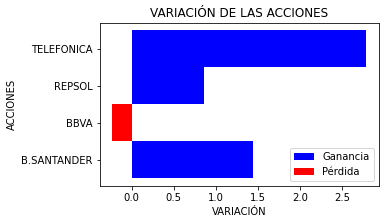

In [16]:
graficar(df4,'Variacion','Nombre',5,3)

In [18]:
#imprime la variacion de Santander
santander=df.loc[7, 'Variacion']
santander

bbva=df.loc[10, 'Variacion']
bbva

repsol=df.loc[30, 'Variacion']
repsol

telefonica=df.loc[33, 'Variacion']
telefonica


print(santander)
print(bbva)
print(repsol)
print(telefonica)

-2.85
-1.2
-0.64
0.01


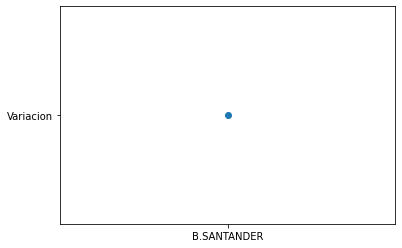

In [20]:
# Importar el módulo pyplot con el alias plt
import matplotlib.pyplot as plt
# Crear la figura y los ejes
fig, ax = plt.subplots()
# Dibujar puntos
ax.scatter(x = ['B.SANTANDER'], y = ['Variacion'])

# Guardar el gráfico en formato png
plt.savefig('Santander.png')
# Mostrar el gráfico
plt.show()


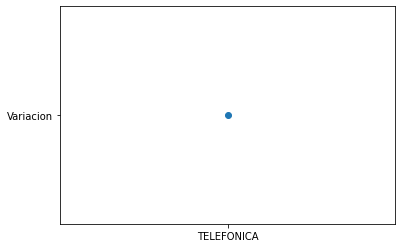

In [21]:
# Crear la figura y los ejes
fig, ax = plt.subplots()
# Dibujar puntos
ax.scatter(x = ['TELEFONICA'], y = ['Variacion'])

# Guardar el gráfico en formato png
plt.savefig('Telefonica.png')
# Mostrar el gráfico
plt.show()

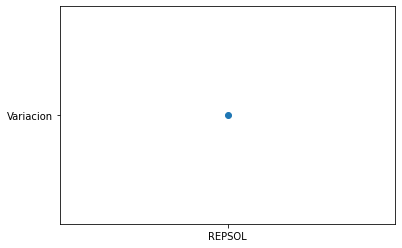

In [22]:
# Crear la figura y los ejes
fig, ax = plt.subplots()
# Dibujar puntos
ax.scatter(x = ['REPSOL'], y = ['Variacion'])

# Guardar el gráfico en formato png
plt.savefig('repsol.png')
# Mostrar el gráfico
plt.show()

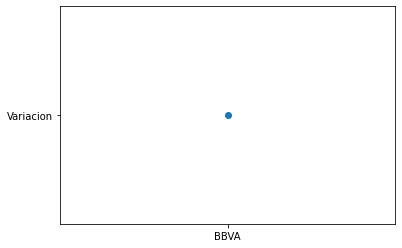

In [23]:
# Crear la figura y los ejes
fig, ax = plt.subplots()
# Dibujar puntos
ax.scatter(x = ['BBVA'], y = ['Variacion'])

# Guardar el gráfico en formato png
plt.savefig('BBVA.png')
# Mostrar el gráfico
plt.show()